<a href="https://colab.research.google.com/github/LeslyVictoria2/CSST106-CS4B/blob/main/4B_VICTORIA_EXER2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSST106 - Perception and Computer Vision**
##**EXERCISE 2**
###**Lesly-Ann B. Victoria from BSCS-4B**

### **PACKAGES**

In [6]:
#Unistall the current Package.
!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python

Found existing installation: opencv-python-headless 4.10.0.84
Uninstalling opencv-python-headless-4.10.0.84:
  Successfully uninstalled opencv-python-headless-4.10.0.84


In [7]:
#Install necessary development tools and dependencies required to build OpenCV from source.
!apt-get install -y cmake
!apt-get install -y libopencv-dev build-essential cmake git pkg-config libgtk-3-dev \
   libavcodec-dev libavformat-dev libswscale-dev libtbb2 libtbb-dev libjpeg-dev \
   libpng-dev libtiff-dev libdc1394-22-dev libv4l-dev v4l-utils \
   libxvidcore-dev libx264-dev libxine2-dev gstreamer1.0-tools \
   libgstreamer-plugins-base1.0-dev libgstreamer-plugins-good1.0-dev \
   libgtk2.0-dev libtiff5-dev libopenexr-dev libatlas-base-dev \
   python3-dev python3-numpy libtbb-dev libeigen3-dev \
   libfaac-dev libmp3lame-dev libtheora-dev libvorbis-dev \
   libxvidcore-dev libx264-dev yasm libopencore-amrnb-dev \
   libopencore-amrwb-dev libv4l-dev libxine2-dev libtesseract-dev \
   liblapacke-dev libopenblas-dev checkinstall

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libdc1394-22-dev


In [8]:
#Clone the OpenCV repository from GitHub.
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

fatal: destination path 'opencv' already exists and is not an empty directory.
fatal: destination path 'opencv_contrib' already exists and is not an empty directory.


In [9]:
#Change directory to the cloned OpenCV directory.
%cd opencv
#Create a build directory for building the OpenCV source.
!mkdir build
#Move into the newly created build directory.
%cd build

#Run the CMake configuration for building OpenCV with specific options:
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_ENABLE_NONFREE=ON \
       -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
       -D BUILD_EXAMPLES=ON ..

#Compile OpenCV using 8 threads (parallel compilation) for faster build times.
!make -j8
#Install the compiled OpenCV library into the system.
!make install

/content/opencv
mkdir: cannot create directory ‘build’: File exists
/content/opencv/build
-- Detected processor: x86_64
-- Looking for ccache - not found
-- The imported target "openjpip" references the file
   "/usr/lib/x86_64-linux-gnu/libopenjpip.so.2.4.0"
but this file does not exist.  Possible reasons include:
* The file was deleted, renamed, or moved to another location.
* An install or uninstall procedure did not complete successfully.
* The installation package was faulty and contained
   "/usr/lib/x86_64-linux-gnu/openjpeg-2.1/OpenJPEGTargets.cmake"
but not all the files it references.

-- The imported target "opj_decompress" references the file
   "/usr/bin/opj_decompress"
but this file does not exist.  Possible reasons include:
* The file was deleted, renamed, or moved to another location.
* An install or uninstall procedure did not complete successfully.
* The installation package was faulty and contained
   "/usr/lib/x86_64-linux-gnu/openjpeg-2.1/OpenJPEGTargets.cmake"
but

### **TASK 1: SIFT (Scale-Invariant Feature Transform) FEATURE EXTRACTION**

In [19]:
#Install the OpenCV headless version for environments where display (GUI) functionality is not required.
!pip install opencv-python-headless

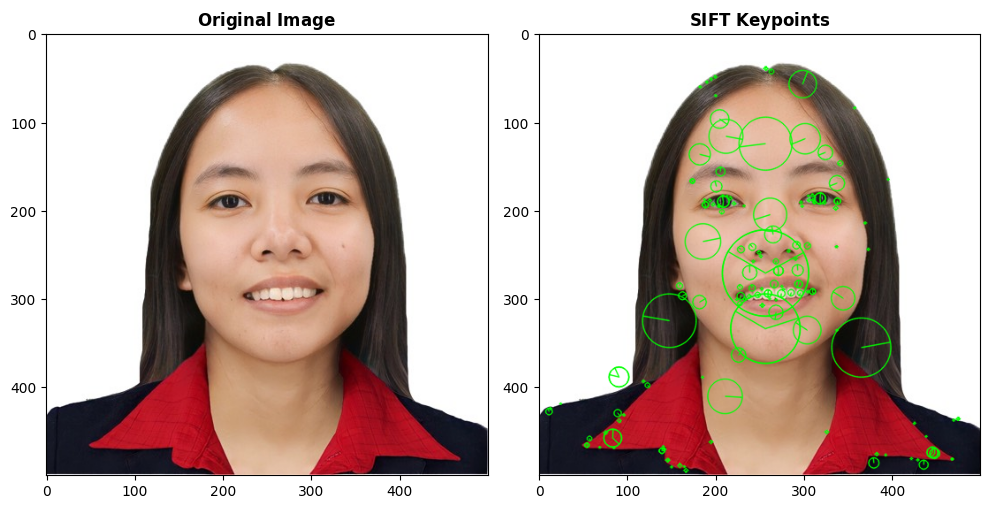

In [26]:
#Import Libraries.
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#Load the Original Image.
image_path = '/content/drive/MyDrive/2X2.jpg'
image = Image.open(image_path)

#Convert the PIL image to a NumPy array (already in RGB format).
image_np = np.array(image)

#Convert to grayscale for keypoint detection.
gray_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)

#Initialize the SIFT (Scale-Invariant Feature Transform).
sift = cv2.SIFT_create()

#Detect keypoints and compute descriptors.
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

#Draw the detected keypoints on the original image (in RGB format).
image_with_keypoints = cv2.drawKeypoints(image_np, keypoints, None, (0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#Display Original Image.
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title(r'$\bf{Original\ Image}$')

#Display SIFT Keypoints.
plt.subplot(1, 2, 2)
plt.imshow(image_with_keypoints)
plt.title(r'$\bf{SIFT\ Keypoints}$')
plt.tight_layout()
plt.show()

### **TASK 2: SUFT (Speeded-Up Robust Features) FEATURE EXTRACTION**

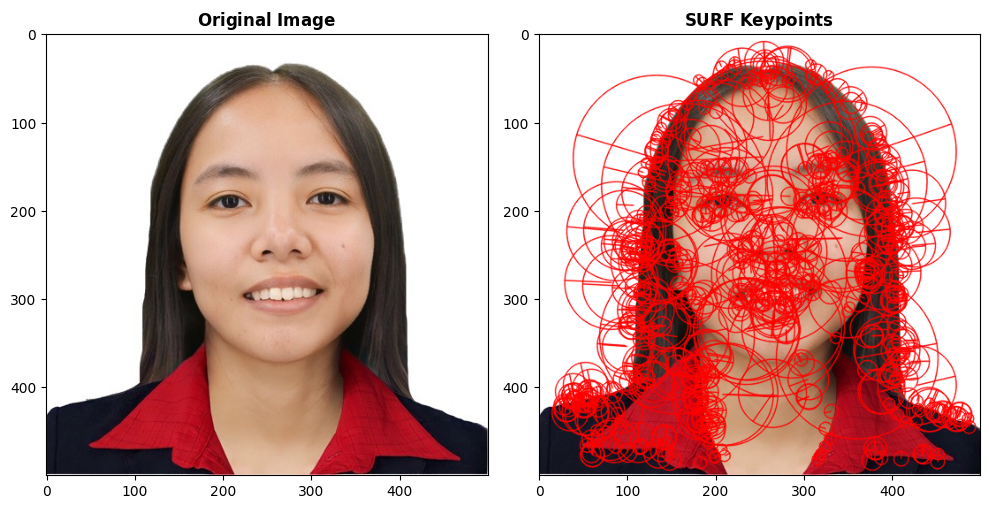

In [28]:
#Import Libraries.
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#Load the Original Image.
image_path = '/content/drive/MyDrive/2X2.jpg'
image = Image.open(image_path)

#Convert the PIL image to a NumPy array (already in RGB format).
image_np = np.array(image)

#Convert to grayscale for keypoint detection.
gray_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)

#Initialize the SURF (Speeded-Up Robust Features).
surf = cv2.xfeatures2d.SURF_create()

#Detect keypoints and compute descriptors.
keypoints, descriptors = surf.detectAndCompute(gray_image, None)

#Draw the detected keypoints on the original image (in RGB format).
image_with_keypoints = cv2.drawKeypoints(image_np, keypoints, None, (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#Display Original Image.
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title(r'$\bf{Original\ Image}$')

#Display SURF Keypoints.
plt.subplot(1, 2, 2)
plt.imshow(image_with_keypoints)
plt.title(r'$\bf{SURF\ Keypoints}$')
plt.tight_layout()
plt.show()

### **TASK 3: ORB (Oriented FAST and Rotated BRIEF) FEATURE EXTRACTION**

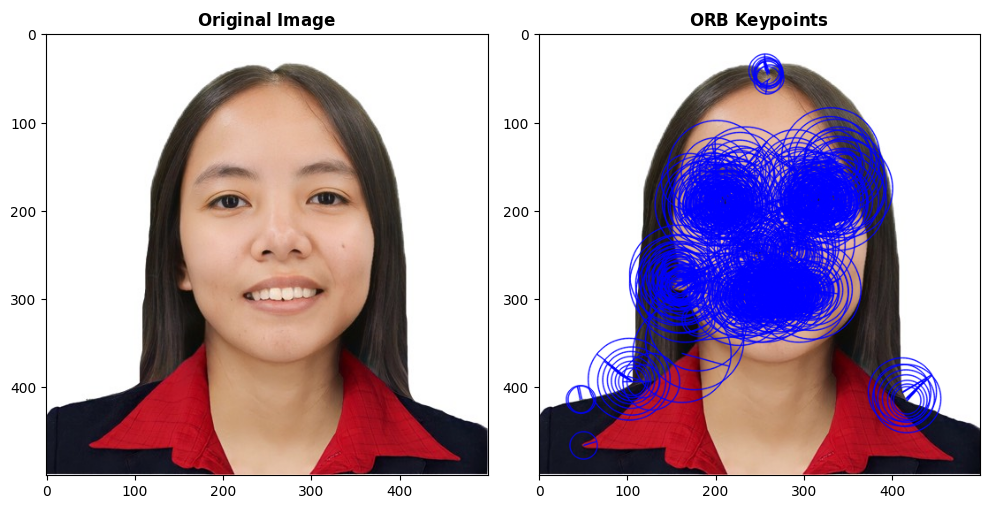

In [29]:
#Import Libraries.
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#Load the Original Image.
image_path = '/content/drive/MyDrive/2X2.jpg'
image = Image.open(image_path)

#Convert the PIL image to a NumPy array (already in RGB format).
image_np = np.array(image)

#Convert to grayscale for keypoint detection.
gray_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)

#Initialize ORB (Oriented FAST and Rotated BRIEF).
orb = cv2.ORB_create()

#Detect keypoints and compute descriptors.
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

#Draw the detected keypoints on the original image (in RGB format).
image_with_keypoints = cv2.drawKeypoints(image_np, keypoints, None, (0, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#Display Original Image.
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title(r'$\bf{Original\ Image}$')

#Display ORB Keypoints.
plt.subplot(1, 2, 2)
plt.imshow(image_with_keypoints)
plt.title(r'$\bf{ORB\ Keypoints}$')
plt.tight_layout()
plt.show()

### **TASK 4: FEATURE MATCHING**

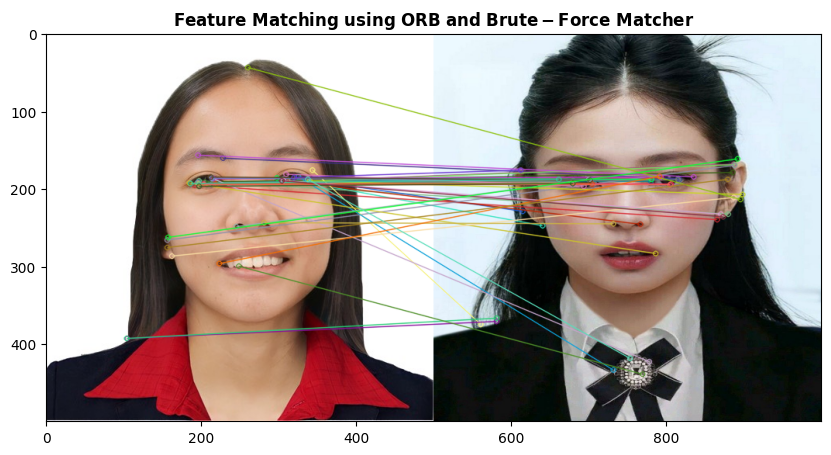

In [48]:
#Import Libraries.
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#Load the two images.
image1_path = '/content/drive/MyDrive/2X2.jpg'
image2_path = '/content/drive/MyDrive/jennie.jpg'
image1 = Image.open(image1_path)
image2 = Image.open(image2_path)

#Convert the images to NumPy arrays.
image1_np = np.array(image1)
image2_np = np.array(image2)

#Resize the images to the same size.
height, width = image1_np.shape[:2]
image2_np = cv2.resize(image2_np, (width, height))

#Convert to grayscale for keypoint detection.
gray_image1 = cv2.cvtColor(image1_np, cv2.COLOR_RGB2GRAY)
gray_image2 = cv2.cvtColor(image2_np, cv2.COLOR_RGB2GRAY)

#Initialize ORB (Oriented FAST and Rotated BRIEF).
orb = cv2.ORB_create(nfeatures=500)

#Detect keypoints and compute descriptors for both images.
keypoints1, descriptors1 = orb.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray_image2, None)

#Initialize Brute-Force Matcher.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

#Match descriptors between the two images.
matches = bf.match(descriptors1, descriptors2)

#Sort matches based on distance (the lower the distance, the better the match).
matches = sorted(matches, key=lambda x: x.distance)

#Draw the top matches (you can adjust the number of matches to display).
matched_image = cv2.drawMatches(image1_np, keypoints1, image2_np, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

#Display the feature matching keypoints.
plt.figure(figsize=(10, 6))
plt.imshow(matched_image)
plt.title(r'$\bf{Feature\ Matching\ using\ ORB\ and\ Brute-Force\ Matcher}$')
plt.show()

### **TASK 5: APPLICATIONS OF FEATURE MATCHING**

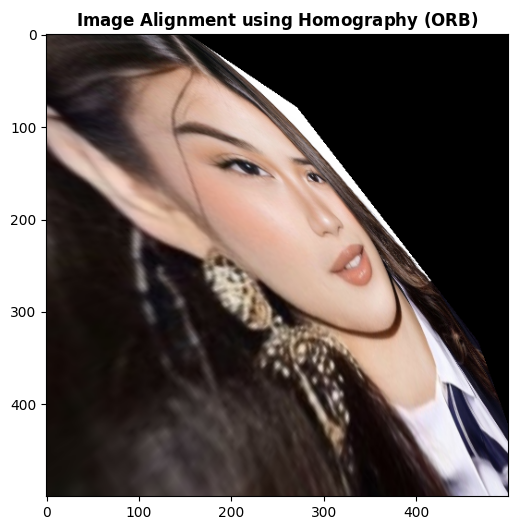

In [49]:
#Import Libraries.
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#Load the two images.
image1_path = '/content/drive/MyDrive/2X2.jpg'
image2_path = '/content/drive/MyDrive/aiah.jpg'
image1 = Image.open(image1_path)
image2 = Image.open(image2_path)

#Convert the images to NumPy arrays.
image1_np = np.array(image1)
image2_np = np.array(image2)

#Resize the second image to match the first image's size.
height, width = image1_np.shape[:2]
image2_np = cv2.resize(image2_np, (width, height))

#Convert to grayscale for keypoint detection.
gray_image1 = cv2.cvtColor(image1_np, cv2.COLOR_RGB2GRAY)
gray_image2 = cv2.cvtColor(image2_np, cv2.COLOR_RGB2GRAY)

#Initialize ORB (Oriented FAST and Rotated BRIEF).
orb = cv2.ORB_create()

#Detect keypoints and compute descriptors using ORB.
keypoints1, descriptors1 = orb.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray_image2, None)

#Match features using BFMatcher.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

#Sort matches based on distance.
matches = sorted(matches, key=lambda x: x.distance)

#Extract location of good matches.
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

#Find the homography matrix.
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)

#Warp the second image to align with the first image.
h, w = image1_np.shape[:2]
result = cv2.warpPerspective(image2_np, M, (w, h))

#Display the applications of feature matching.
plt.figure(figsize=(10, 6))
plt.imshow(result)
plt.title(r'$\bf{Image\ Alignment\ using\ Homography\ (ORB)}$')
plt.show()

### **TASK 6: COMBINING FEATURE EXTRACTION METHODS**

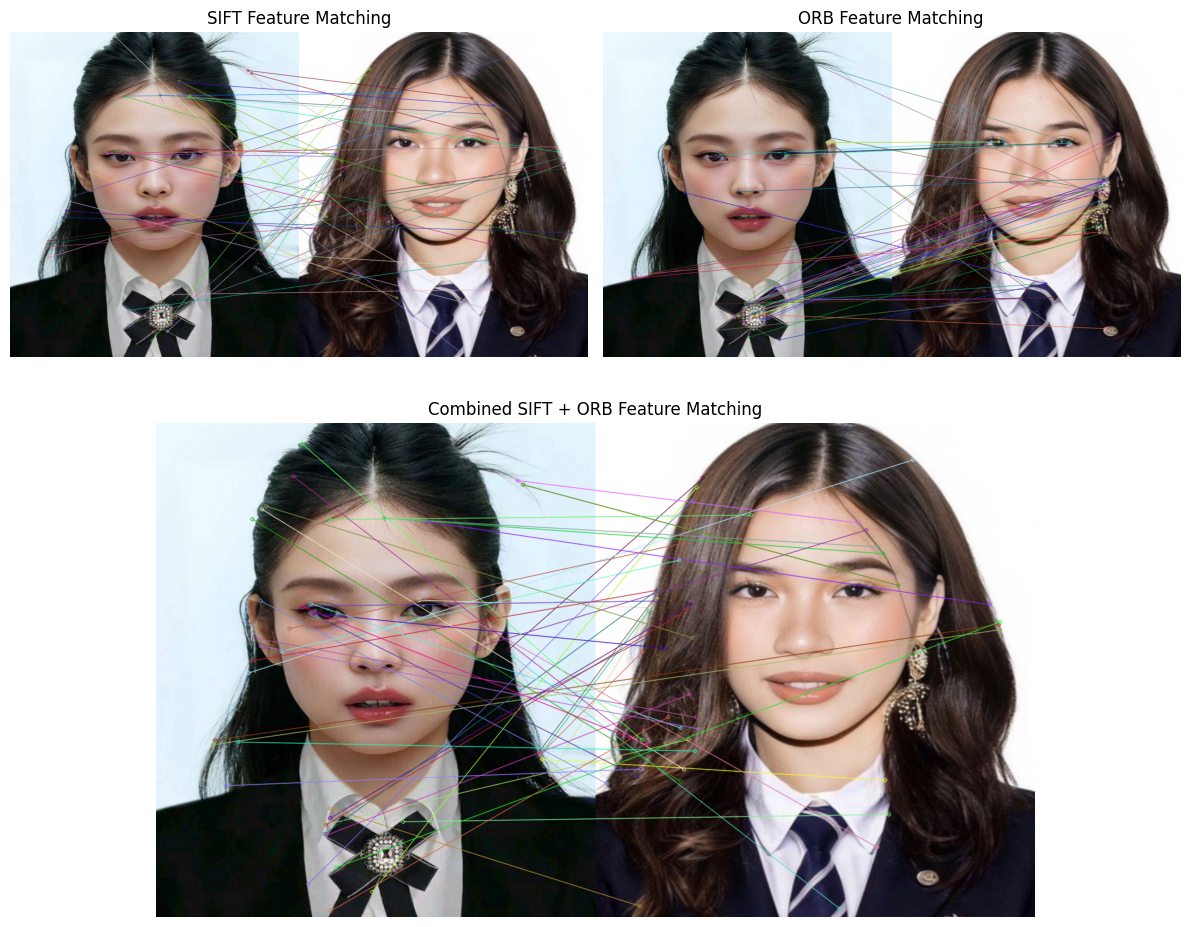

In [65]:
#Import Libraries.
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#Load the two images in color.
image1_path = '/content/drive/MyDrive/jennie.jpg'
image2_path = '/content/drive/MyDrive/aiah.jpg'
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

#Resize images.
height, width = 900, 800
image1 = cv2.resize(image1, (width, height))
image2 = cv2.resize(image2, (width, height))

#Convert images to grayscale for feature detection.
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

#SIFT detector.
sift = cv2.SIFT_create()
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(gray1, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(gray2, None)

#ORB detector.
orb = cv2.ORB_create()
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(gray1, None)
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(gray2, None)

#Brute Force Matcher for SIFT (since SIFT uses 128-dim descriptors).
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_sift = bf_sift.match(descriptors1_sift, descriptors2_sift)

#Brute Force Matcher for ORB (since ORB uses 32-dim descriptors).
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_orb = bf_orb.match(descriptors1_orb, descriptors2_orb)

#Sort matches by distance (optional, for better visualization).
matches_sift = sorted(matches_sift, key=lambda x: x.distance)
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

#Draw top 50 matches for SIFT and ORB (using original BGR images).
img_matches_sift = cv2.drawMatches(image1, keypoints1_sift, image2, keypoints2_sift, matches_sift[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches_orb = cv2.drawMatches(image1, keypoints1_orb, image2, keypoints2_orb, matches_orb[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

#Combine SIFT and ORB matches.
combined_matches = matches_sift[:25] + matches_orb[:25]

#Combine keypoints for display.
combined_keypoints1 = keypoints1_sift + keypoints1_orb
combined_keypoints2 = keypoints2_sift + keypoints2_orb

#Draw matches for combined SIFT + ORB (using original BGR images).
combined_img_matches = cv2.drawMatches(
    image1, combined_keypoints1, image2, combined_keypoints2, combined_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)
plt.figure(figsize=(12, 10))

#Display SIFT Feature Matching.
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img_matches_sift, cv2.COLOR_BGR2RGB))
plt.title('SIFT Feature Matching')
plt.axis('off')

#Display ORB Feature Matching.
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(img_matches_orb, cv2.COLOR_BGR2RGB))
plt.title('ORB Feature Matching')
plt.axis('off')

# Display combined SIFT + ORB matches.
plt.subplot(2, 1, 2)
plt.imshow(cv2.cvtColor(combined_img_matches, cv2.COLOR_BGR2RGB))
plt.title('Combined SIFT + ORB Feature Matching')
plt.axis('off')
plt.tight_layout()
plt.show()